In [1]:
# -*- coding: utf-8 -*-
# author: Zhichao Pan
import tqdm
import matplotlib.cm as cm
import matplotlib.colors as col
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib.pylab as mpl
from scipy.fft import fft
from scipy.signal import welch
from scipy import signal, integrate, interpolate
import matplotlib.ticker as tk
import numpy as np 
import matplotlib
from scipy import signal
import scipy.io as sio


def plot_init():
    mpl.rcParams['lines.linewidth'] = 1
    mpl.rcParams['axes.linewidth'] = 1
    mpl.rcParams['axes.labelsize'] = 22
    mpl.rcParams['axes.titlesize'] = 22
    mpl.rcParams['xtick.labelsize'] = 20
    mpl.rcParams['ytick.labelsize'] = 20
    mpl.rcParams['xtick.major.size'] = 5  # 刻标长度
    mpl.rcParams['xtick.major.width'] = 1  # 刻标线宽
    mpl.rcParams['ytick.major.size'] = 5
    mpl.rcParams['ytick.major.width'] = 1
    mpl.rcParams['font.family'] = 'Times New Roman'#'sans-serif'
    mpl.rcParams['font.weight'] =  'bold'

#     mpl.rcParams['font.sans-serif'] = ['HeiTi TC']   #显示中文
    mpl.rcParams['axes.unicode_minus']=False       #显示负号
    
    white = '#FFFFFF'
    dred = '#FF221F'
    jgred = '#E94414'
    yellow = '#FFFF00'
    green = '#99CC33'
    dgren = '#62724B'
    xmublue = '#0D2F6E'
    colorList1 = [white, dred, yellow]
    cmap1 = col.LinearSegmentedColormap.from_list('xmu1', colorList1)
    cm.register_cmap(cmap=cmap1)
    
plot_init()

In [2]:
# load single I-V curves generated from the I_V traces splitting module.
G_forward = np.load('G_forward.npy')
G_reverse = np.load('G_reverse.npy')

V_forward = np.load('V_forward.npy')
V_reverse = np.load('V_reverse.npy')
print('total loops: ', G_forward.shape[0])

total loops:  1162


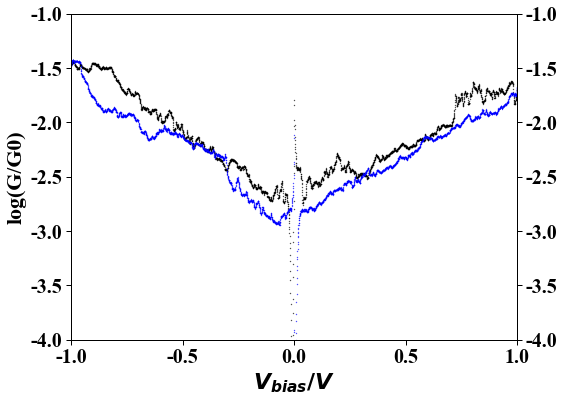

In [4]:
# loop visualization
fig, ax1 = plt.subplots(figsize=(8, 6), facecolor='w')
ridx = np.random.choice(G_forward.shape[0])  # G_reverse.shape[0]

ax1.scatter(V_forward[ridx], G_forward[ridx], s=0.1, c='k')
ax1.set_ylim(-4, -1)
ax1.set_xlim(-1, 1)
ax1.set_ylabel('log(G/G0)')
ax1.set_xlabel('$V_{bias} / V$')

ax2 = plt.twinx(ax1)
# ax2.plot(V_reverse[ridx], G_reverse[ridx], c='b')
ax1.scatter(V_reverse[ridx], G_reverse[ridx], s=0.1, c='b')
# ax1.scatter(V_reverse[ridx][-1000], G_reverse[ridx][-1000], s=100, c='b')
ax2.set_ylim(-4, -1)

plt.show()  

In [12]:
vaxis_f = np.array(V_forward[ridx][:-1]).reshape(1, -1) 
gaxis_f = np.array(G_forward[ridx][:-1]).reshape(1, -1)
vaxis_r = np.array(V_reverse[ridx]).reshape(1, -1) 
gaxis_r = np.array(G_reverse[ridx]).reshape(1, -1) 

loopIdx = []
threshold = 115
for i in range(V_forward.shape[0]):
    fIdx = np.where(V_forward[i] < -0.1)[0]
    rIdx = np.where(V_reverse[i] < -0.1)[0]
    fLeftG = G_forward[i][fIdx]
    rLeftG = G_reverse[i][rIdx]

    fIdx_right = np.where(V_forward[i] > 0.1)[0]
    rIdx_right = np.where(V_reverse[i] > 0.1)[0]
    fRightG = G_forward[i][fIdx_right]
    rRightG = G_reverse[i][rIdx_right]

    diff = fLeftG - rLeftG[::-1]
    diff_right = fRightG - rRightG[::-1]
    # if different in the left and right branch > the gap threshold
    # the forward and backward trace form a loop.
    a, b = np.sum(diff** 2), np.sum(diff_right**2)
    if a > threshold and b > threshold: loopIdx.append(i)

print('# loops: ', len(loopIdx))
print('# non-loops: ', G_forward.shape[0] - len(loopIdx))
print('proportion of the loops: ', len(loopIdx) / G_forward.shape[0])

# loops:  221
# non-loops:  941
proportion of the loops:  0.1901893287435456


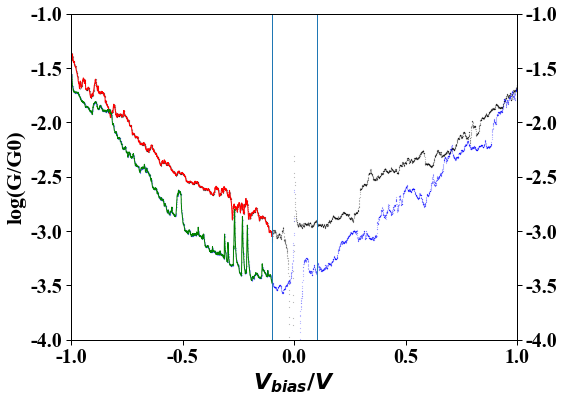

In [22]:
# visualize the selected loops
fig, ax1 = plt.subplots(figsize=(8, 6), facecolor='w')
ridx = np.random.choice(loopIdx)  # G_reverse.shape[0]
ax1.scatter(V_forward[ridx], G_forward[ridx], s=0.01, c='k')
# ax1.scatter(V_forward[ridx][fIdx], G_forward[ridx][fIdx], s=1, c='r')
ax1.plot(V_forward[ridx][fIdx], G_forward[ridx][fIdx], c='r')

ax1.axvline(x = -0.1)
ax1.axvline(x = 0.1)
ax1.set_ylim(-4, -1)
ax1.set_xlim(-1, 1)
ax1.set_ylabel('log(G/G0)')
ax1.set_xlabel('$V_{bias} / V$')

ax2 = plt.twinx(ax1)

ax1.scatter(V_reverse[ridx], G_reverse[ridx], s=0.01, c='b')
# ax1.scatter(V_reverse[ridx][rIdx], G_reverse[ridx][rIdx], s=1, c='g')
ax1.plot(V_reverse[ridx][rIdx], G_reverse[ridx][rIdx], c='g')
ax2.set_ylim(-4, -1)

plt.show()